# **Q.농어의 무게 예측**

In [2]:
import numpy as np

#데이터 준비
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

**Case1. 농어의 길이만 사용**


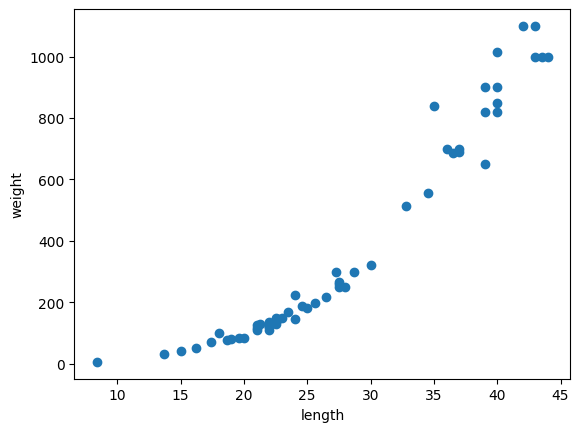

In [12]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> Step01. 훈련 세트 준비

In [ ]:
#훈련세트와 테스트세트 준비
from sklearn.model_selection import train_test_split

#회귀 문제에서는 클래스의 비율을 맞춰주는 stratify를 사용하지 않음
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

#reshape : 행(-1) * 열(1) 인 2차원 배열 생성
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


> Step02. 회귀 모델 훈련

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

#훈련 세트를 넣어 훈련하기
knr.fit(train_input, train_target)

#테스트 세트를 넣어 점수 확인
knr.score(test_input, test_target)

0.992809406101064

***결정계수(R<sup>2</sup>)?**

R<sup>2</sup> = 1 - (타깃 - 예측)<sup>2</sup>의 합 / (타깃 - 평균)<sup>2</sup>의 합

ㄴ 1에 가까울 수록 좋은 성능의 모델


In [ ]:
from sklearn.metrics import mean_absolute_error

#test_input으로 예측한 값
test_prediction = knr.predict(test_input)

#(타깃 - 예측) 절대값의 평균
mae = mean_absolute_error(test_target, test_prediction)

#약 9g의 오차 확인 가능
print(mae)

19.157142857142862


***과대적합? 과소적합?**

과소적합(underfitting) : 훈련세트보다 테스트세트의 점수가 높을 경우

과대적합(overfitting) : 훈련세트에 너무 적합하여 테스트세트에서 결과값을 내지 못할 경우

In [ ]:
#훈련 세트 성능
knr.score(train_input, train_target)

0.9698823289099254

In [ ]:
#테스트 세트 성능
knr.score(test_input, test_target)

0.992809406101064



**Problem** : 과소 적합 발생!

**Solution** : 이웃의 개수 줄이기




In [ ]:
#이웃의 개수, 기본값 5를 3으로 줄이기
knr.n_neighbors = 3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609




---



***아주 긴 농어라면?**

ㄴ 결과값을 추정하기 어려움

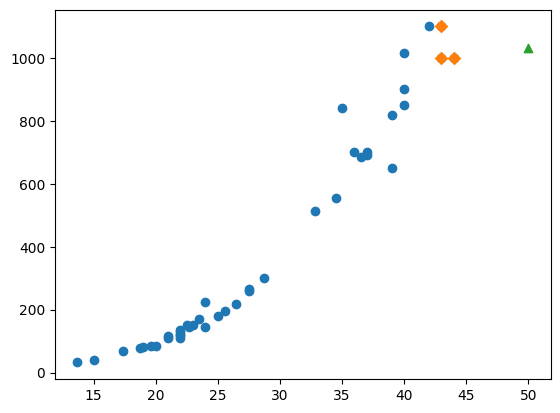

In [ ]:
#50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#50cm 농어 데이터 표시
plt.scatter(50, 1033, marker = '^')

plt.show()

***선형회귀(linear regression)**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대한 예측
print(lr.predict([[50]]))

#_ : 내가 넣은 데이터가 아닌 학습된 데이터
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


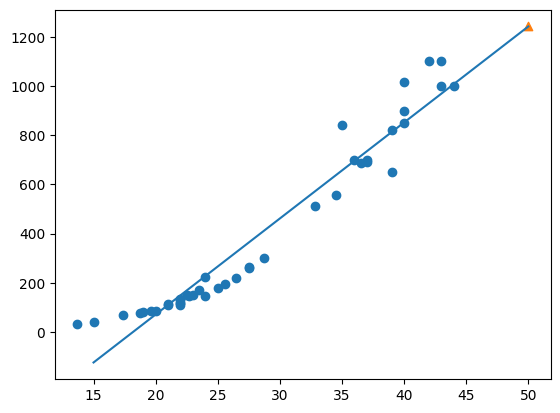

In [ ]:
#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

#50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')

plt.show()

In [ ]:
#결정계수 확인
print(lr.score(train_input, train_target))

print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


***다항회귀**

In [ ]:
#제곱 특성 추가!!
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

#다항회귀 모델 훈련
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


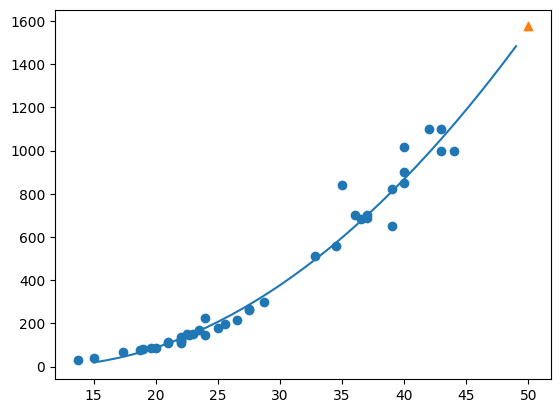

0.9706807451768623
0.9775935108325122


In [ ]:
#구간별 직선을 그리기 위해 15 ~ 49 정수 배열 생성
point = np.arange(15, 50)

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#15 ~ 49 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어 데이터
plt.scatter([50], [1574], marker = '^')
plt.show()

#score 확인
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))



---



**Problem** : 과대 적합 발생!


***다중 회귀(multiple regression)**



In [4]:
#판다스로 데이터 준비
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

print(perch_full)

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

> Step01. 다항 특성 만들기



In [5]:
#다항 특성 만들기 예시
from sklearn.preprocessing import PolynomialFeatures

#degree = 2
poly = PolynomialFeatures()
poly.fit([[2, 3]])

#1(bias, 자동 생성), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


y = a*x + b*1

=> [a, b] * [x, 1]

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)
#!!!!!!!!!!(42, 55) => (42, 5) 강의랑 다른 값

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


(42, 55)
0.9999999999996433
-144.40579436844948


**Problem** : 과대적합 발생

**Solution** : 규제

In [9]:
#규제를 가하기 전 표준화 하기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

규제가 적용된 선형모델1 : Ridge

In [10]:
#규제가 적용된 선형모델1 : Ridge
from sklearn.linear_model import Ridge

#Ridge(alpha = 1) : 규제의 정도
ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


최적의 alpha 값 찾기

ㄴ 적절한 규제 강도 찾기

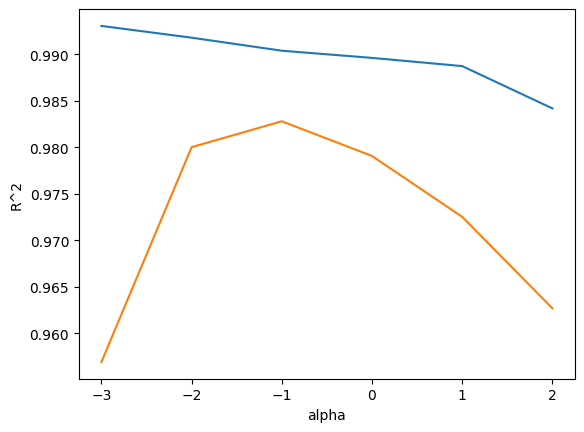

In [13]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
train_score = []
test_score = []

for alpha in alpha_list :
  #ridge model 만들기
  ridge = Ridge(alpha = alpha)

  #ridge model 훈련
  ridge.fit(train_scaled, train_target)

  #훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()


규제가 적용된 선형모델2 : Lasso

In [14]:
#규제가 적용된 선형모델2 : Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

#Lasso의 특징 : 특성 가중치를 0으로 만들어 특정 특성 배제 가능

0.989789897208096
0.9800593698421883
